In [1]:
import sys
sys.path.append("../../../")

## 数据

In [2]:
import matplotlib.pyplot as plt
from pylib.utils.functions_for_classification import mixtured_2d_2cls, plot_scatter

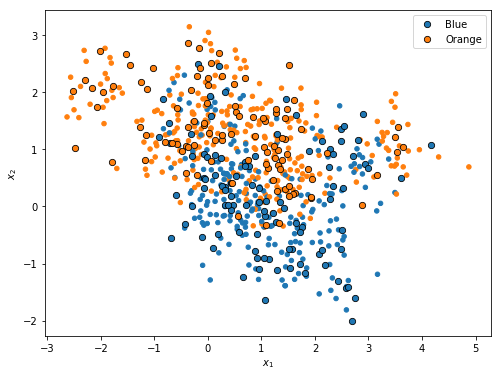

In [3]:
X_train, X_test, y_train, y_test = mixtured_2d_2cls()
plt.figure(figsize=(8, 6))
plot_scatter(X_train, y_train, X_test, y_test)
plt.show()

## 装袋法

In [4]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from pylib.utils.functions_for_classification import plot_decision_boundary

In [5]:
bagging = BaggingClassifier(
    DecisionTreeClassifier(max_depth=3),
    n_estimators=50,
    oob_score=True
)
bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                  n_estimators=50, oob_score=True)

In [6]:
train_err = 1 - bagging.score(X_train, y_train)
print("训练样本误差：{:.3f}".format(train_err))

训练样本误差：0.155


In [7]:
test_err = 1 - bagging.score(X_test, y_test)
print("测试样本误差：{:.3f}".format(test_err))

测试样本误差：0.226


In [10]:
print("OOB 得分: {:.3f}".format(1 - bagging.oob_score_))

OOB 得分: 0.200


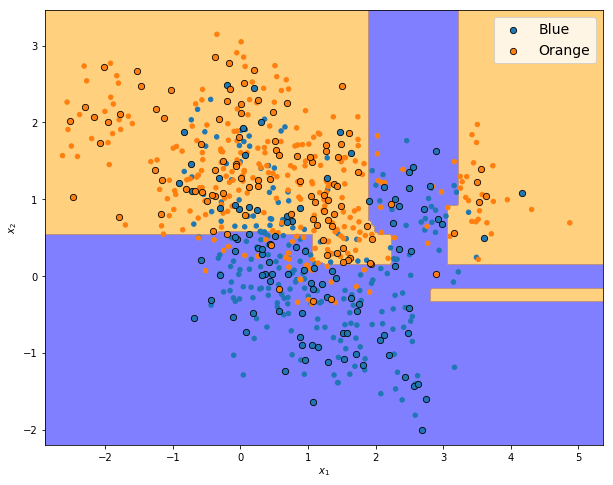

In [28]:
# 画出决策边界
plt.figure(figsize=(10, 8))
plot_decision_boundary(X_train, y_train, X_test, y_test, bagging)
plt.show()

### 查看某棵树的结构

In [23]:
from sklearn import tree
import graphviz

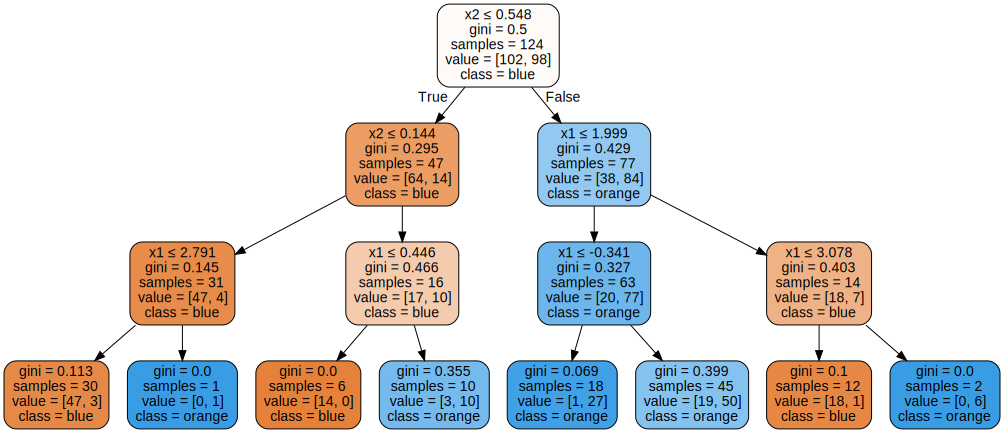

In [24]:
tree_num = 30
dot_data = tree.export_graphviz(bagging.estimators_[tree_num], 
                                feature_names=["x1", "x2"],
                                class_names=["blue", "orange"],
                                out_file=None, 
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 